<a href="https://colab.research.google.com/github/ShashwatM3/Machine-Learning/blob/main/CreditCardFraud/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem
_______

Almost every business on the rise today has often been exposed to credit card fraud. Credit Card fraud is a growing problem, and it’s one that can do significant damage to your business and its bottom line.

Credit Card fraud is like stealing money from 3 different people at the same time. The merchant, the credit card company, and the consumer. After a successful investigation, the fraud will have to cough up the money, but the business is going to look bad for not holding a tighter chain on Credit Card fraud, and their reputation suffers, as well as their sales.

***Hence, based upon such opinions, I have decided to create a model that predicts credit card fraud...***

In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
#Reading Data
df = pd.read_csv("creditcard.csv")
df = df.fillna(0)
print(df.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]


In [6]:
#Exploring the Dataset
print(df.describe())
print()
print(df.info())

              Time           V1  ...       Amount        Class
count  1986.000000  1986.000000  ...  1986.000000  1986.000000
mean    761.035750    -0.284195  ...    68.567925     0.001007
std     451.034025     1.353508  ...   241.621039     0.031726
min       0.000000   -11.140706  ...     0.000000     0.000000
25%     366.000000    -1.045512  ...     4.950000     0.000000
50%     750.000000    -0.437621  ...    15.085000     0.000000
75%    1161.000000     1.095047  ...    63.467500     0.000000
max    1526.000000     1.685314  ...  7712.430000     1.000000

[8 rows x 31 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V

In [7]:
cols = list(df.columns.values)
print(cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


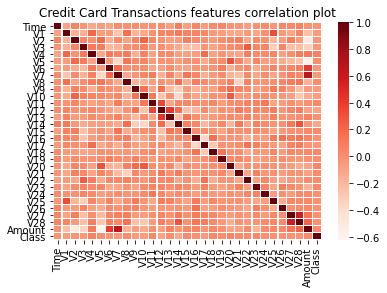

In [8]:
#Analytical Study of Features Correlation of the Data
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

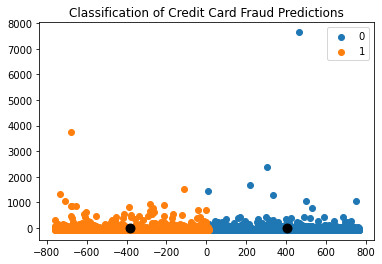

In [10]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)

# Declaring Model
model = KMeans(n_clusters=2)

# Fitting Model
model.fit(df)

# Prediction on the entire data
label = model.predict(df)

u_labels = np.unique(label)
 
#Getting the Centroids
centroids = model.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.title("Classification of Credit Card Fraud Predictions")
plt.show()